# sales_2023_time EDA 플랜

| 단계 | 내용 | 상세 작업 |
|:---|:---|:---|
| 1 | 기본 구조 확인 | - 데이터 크기(shape)<br>- 컬럼 목록(columns)<br>- 데이터 타입(dtypes)<br>- 데이터 샘플(head, tail) |
| 2 | 결측치 확인 | - 컬럼별 결측치 개수 확인 |
| 3 | 주요 지표 요약 | - 총 매출건수 합계<br>- 총 매출금액 합계 |
| 4 | 주요 범주 분석 | - 업종별(분류) 매출 합계 Top 10<br>- 시간대별(0~23시) 매출 합계<br>- 지역별(시군구명) 매출 합계 Top 10 |
| 5 | 시각화 | - 업종별 매출 barplot<br>- 시간대별 매출 lineplot<br>- 지역별 매출 barplot |
| 6 | 통찰 및 특이사항 (선택) | - 야간/심야 소비 집중도<br>- 특정 지역 시간대 소비 집중도 |

In [2]:
!pip install matplotlib pandas seaborn

In [4]:
import matplotlib.font_manager as fm

# 사용 가능한 한글 폰트 확인
available_fonts = [f.name for f in fm.fontManager.ttflist 
                   if any(word in f.name.lower() for word in ['nanum', 'malgun', 'gothic', 'gulim'])]
print(available_fonts)

# 위 결과에서 확인된 사용 가능한 폰트 중 하나를 사용
plt.rc('font', family='폰트이름')

['NanumGothic', 'NanumGothic', 'NanumGothic', 'NanumGothic']


In [5]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import koreanize_matplotlib
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

path = '../data_raw/'
sales_2023_time = pd.read_csv(path + 'card_sales_2023_time.csv', encoding='cp949')

In [6]:
print("Shape:", sales_2023_time.shape)

Shape: (5178, 6)


In [7]:
print("Columns:", sales_2023_time.columns)

Columns: Index(['시군구명', '시간대', '분류', '매출건수', '매출금액합계', '데이터기준일'], dtype='object')


In [8]:
sales_2023_time.dtypes

시군구명      object
시간대        int64
분류        object
매출건수       int64
매출금액합계     int64
데이터기준일     int64
dtype: object

In [9]:
sales_2023_time.head()

,시군구명,시간대,분류,매출건수,매출금액합계,데이터기준일
0,창원시 의창구,0,교육,6,865000,20240101
1,창원시 의창구,0,기타,3,36000,20240101
2,창원시 의창구,0,내구재,233,101080,20240101
3,창원시 의창구,0,레포츠/문화/취미,6626,40106480,20240101
4,창원시 의창구,0,서비스,483,2473435,20240101


In [10]:
sales_2023_time.tail()

,시군구명,시간대,분류,매출건수,매출금액합계,데이터기준일
5173,합천군,23,레포츠/문화/취미,37,538900,20240101
5174,합천군,23,식생활,170,10584500,20240101
5175,합천군,23,여행,3,9000,20240101
5176,합천군,23,유통,1547,14129570,20240101
5177,합천군,23,유흥,12,950000,20240101


In [11]:
sales_2023_time.isnull().sum()

시군구명      0
시간대       0
분류        0
매출건수      0
매출금액합계    0
데이터기준일    0
dtype: int64

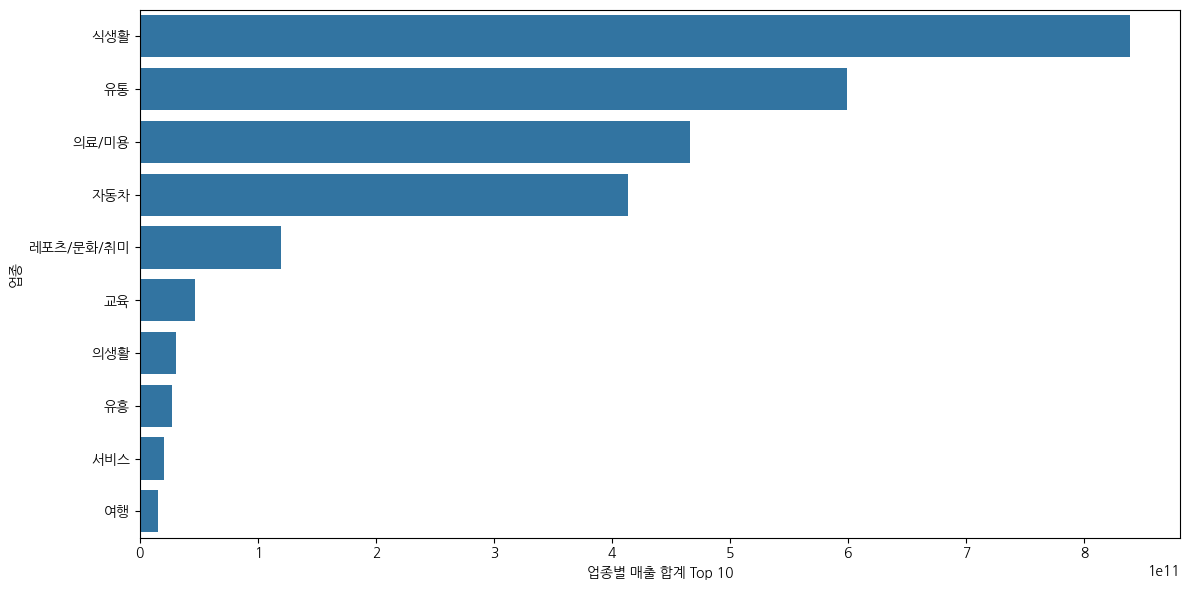

In [12]:
top10_category = (sales_2023_time.groupby('분류')['매출금액합계']
                  .sum()
                  .sort_values(ascending=False)
                  .head(10))

plt.figure(figsize=(12,6))
sns.barplot(x=top10_category.values, y=top10_category.index)
plt.xlabel('업종별 매출 합계 Top 10')
plt.ylabel('총 매출금액(원)')
plt.ylabel('업종')
plt.tight_layout()
plt.show()

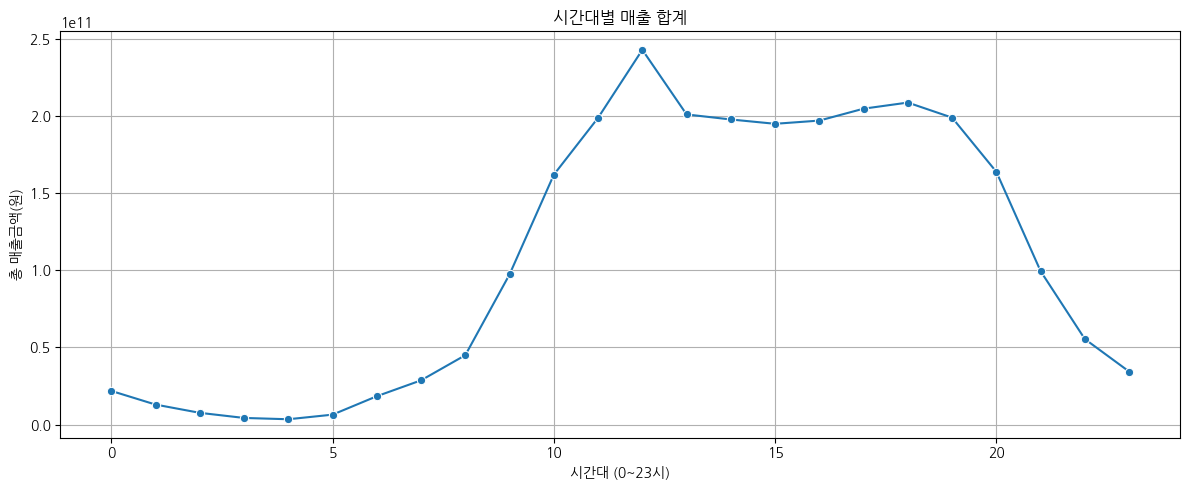

In [16]:
time_sales = (sales_2023_time
              .groupby('시간대')['매출금액합계']
              .sum()
              .sort_index())

plt.figure(figsize=(12,5))
sns.lineplot(x=time_sales.index, y=time_sales.values, marker='o')
plt.title('시간대별 매출 합계')
plt.xlabel('시간대 (0~23시)')
plt.ylabel('총 매출금액(원)')
plt.grid(True)
plt.tight_layout()
plt.show()

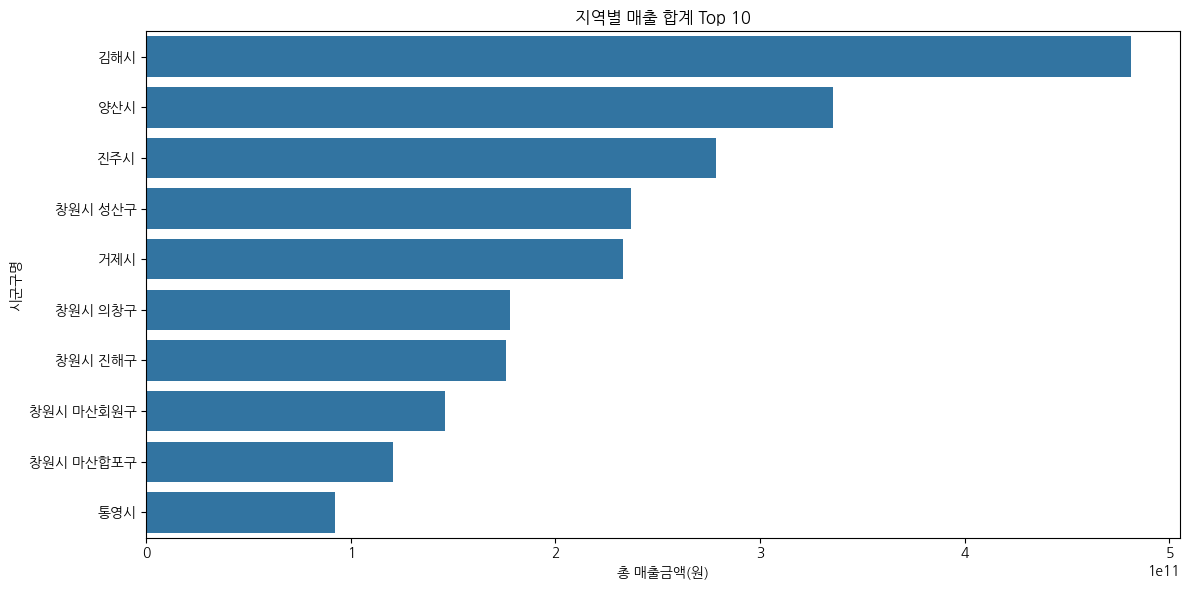

In [17]:
top10_region = (sales_2023_time
                .groupby('시군구명')['매출금액합계']
                .sum()
                .sort_values(ascending=False)
                .head(10))

plt.figure(figsize=(12,6))
sns.barplot(x=top10_region.values, y=top10_region.index)
plt.title('지역별 매출 합계 Top 10')
plt.xlabel('총 매출금액(원)')
plt.ylabel('시군구명')
plt.tight_layout()
plt.show()
